In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Development dataset

In [9]:
df_dev = pd.read_csv("../data/assignment1_dev_set.csv")

In [3]:
df_dev.shape 

(489, 141)

In [4]:
df_dev.head() 

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


In [ ]:
list(df_dev.isnull().sum())

In [10]:
# Remove unnecessary columns
metadata_columns = ['Unnamed: 0', 'Project ID','Experiment type', 'Sex', 'Host age','Disease MESH ID']
df_dev = df_dev.drop(columns = metadata_columns)

Highly correlated pairs:
Streptococcus mitis              Streptococcus oralis                       0.984661
Hungatella hathewayi             Lachnospiraceae bacterium 3_1_57FAA_CT1    0.980509
Bacteroides graminisolvens       Prevotella ruminicola                      0.910267
Prevotella bivia                 Prevotella shahii                          0.906563
Porphyromonas catoniae           Streptococcus mitis                        0.875085
Bacteroides intestinalis         Ruminococcaceae bacterium D16              0.864316
Bacillus megaterium              Clostridium amylolyticum                   0.860058
Anaerostipes butyraticus         Anaerostipes caccae                        0.851647
Porphyromonas catoniae           Streptococcus oralis                       0.832220
Actinomyces lingnae              Fusobacterium nucleatum                    0.805016
Blautia glucerasea               Ruminococcus gnavus                        0.755592
Clostridium asparagiforme        Clostri

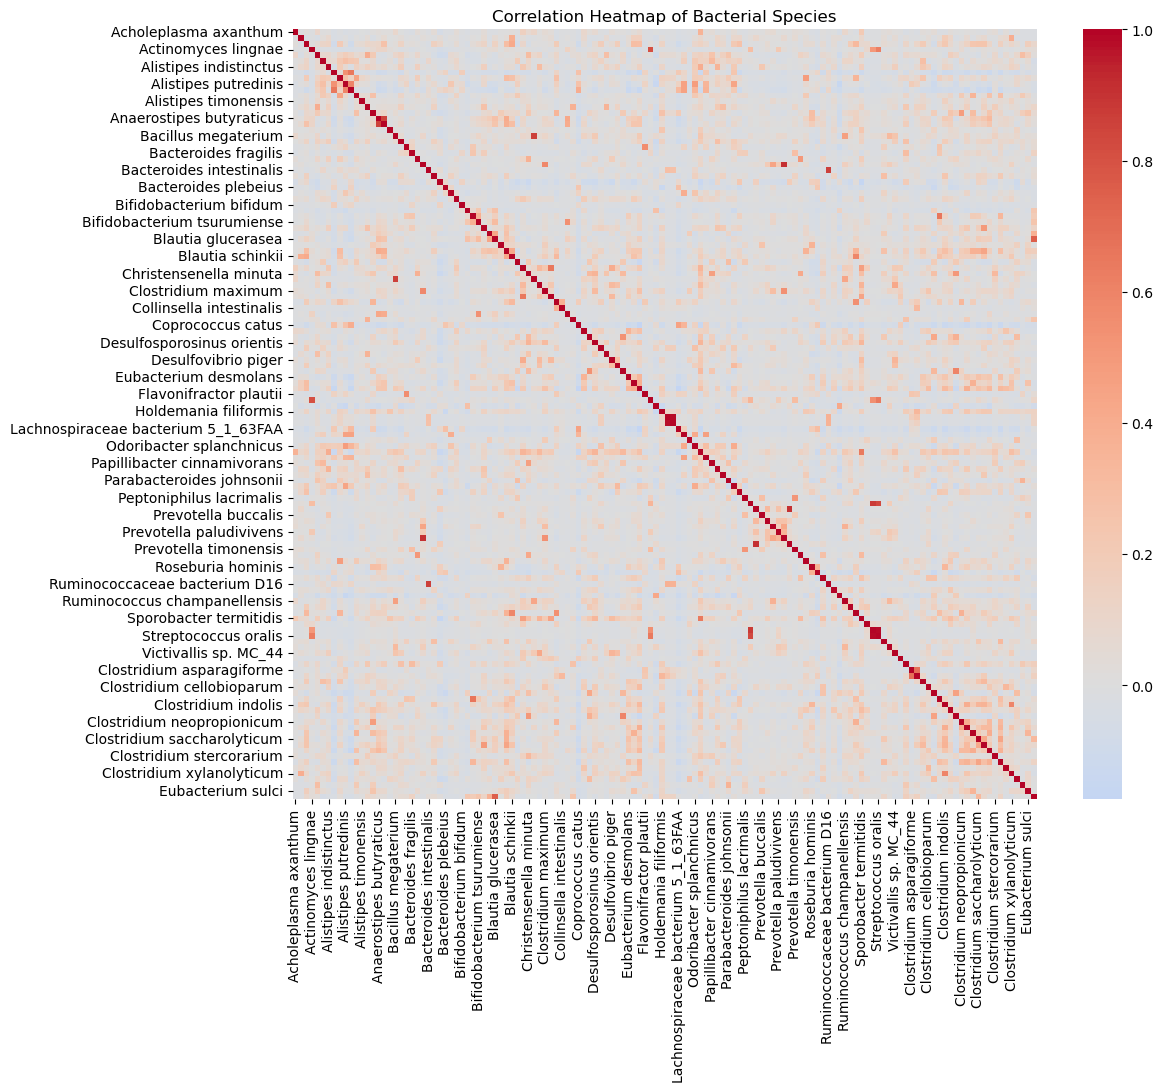

In [12]:
# Pearson's correlation between bacteria

bacteria_species = df_dev.columns.drop(['BMI'])
correlation_matrix=df_dev[bacteria_species].corr(method='pearson')

threshold = 0.5
high_corr_pairs = (
    correlation_matrix.abs()
    .where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("Highly correlated pairs:")
print(high_corr_pairs)

# Species to remove (second species in each pair)
species_to_remove = set()

for pair in high_corr_pairs.index:
    species_to_remove.add(pair[1])

print("Species to remove:", species_to_remove)
# Drop highly correlated species
dev_set_cleaned = df_dev.drop(columns=species_to_remove)
print(f"Reduced from {len(df_dev.columns)} to {len(dev_set_cleaned.columns)} columns.")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Bacterial Species')
plt.show()

In [23]:
dev_set_cleaned.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium saccharogumia,Clostridium saccharolyticum,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci
0,19.01,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.00000,0.0,0.117827,...,0.000000,0.002946,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.002946
1,23.50,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.00000,0.0,0.073486,...,0.000000,0.007194,0.000000,0.002569,0.412652,0.003083,0.000000,0.008736,0.014903,0.077597
2,25.80,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.00000,0.0,0.043590,...,0.002812,0.029528,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.005624
3,23.49,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.34857,0.0,0.026474,...,0.013237,0.163254,0.017649,0.198553,0.000000,0.158842,0.030886,0.000000,0.000000,0.000000
4,22.60,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.00000,0.0,1.732770,...,0.002878,0.423119,0.305106,0.135283,0.000000,0.051811,0.054689,0.020148,0.000000,0.054689


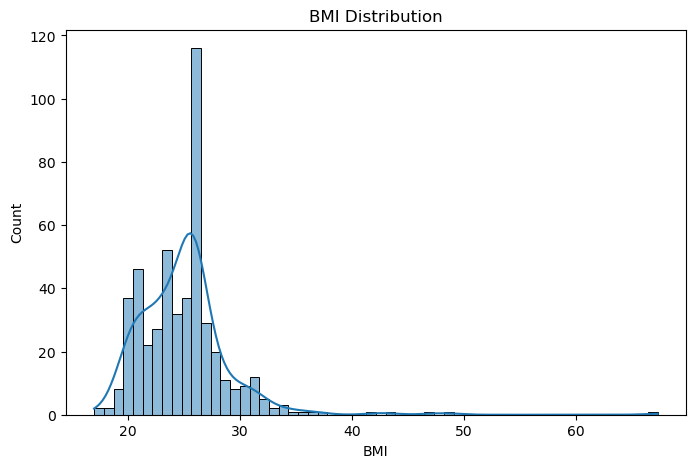

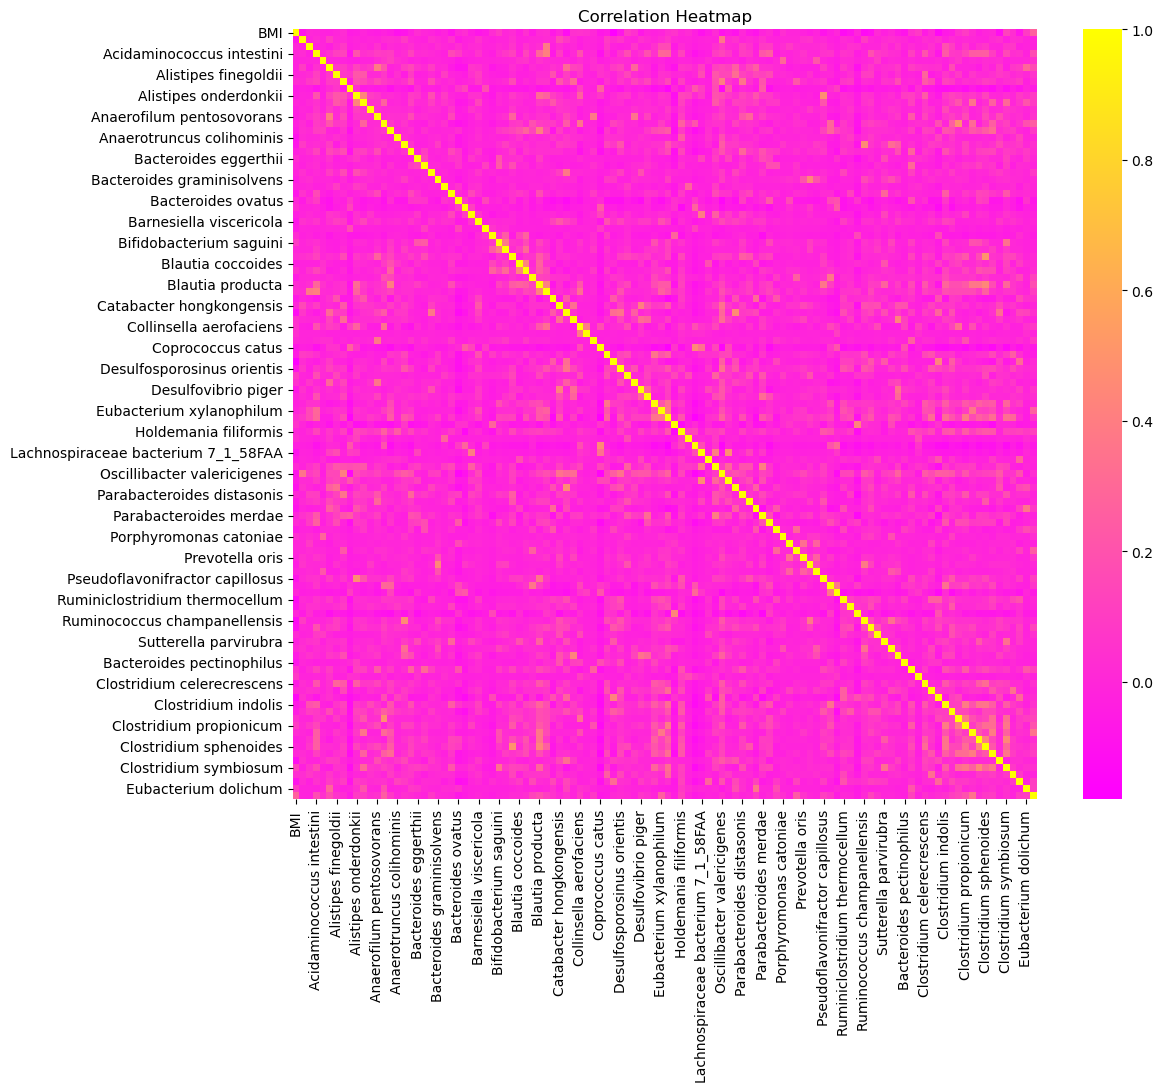

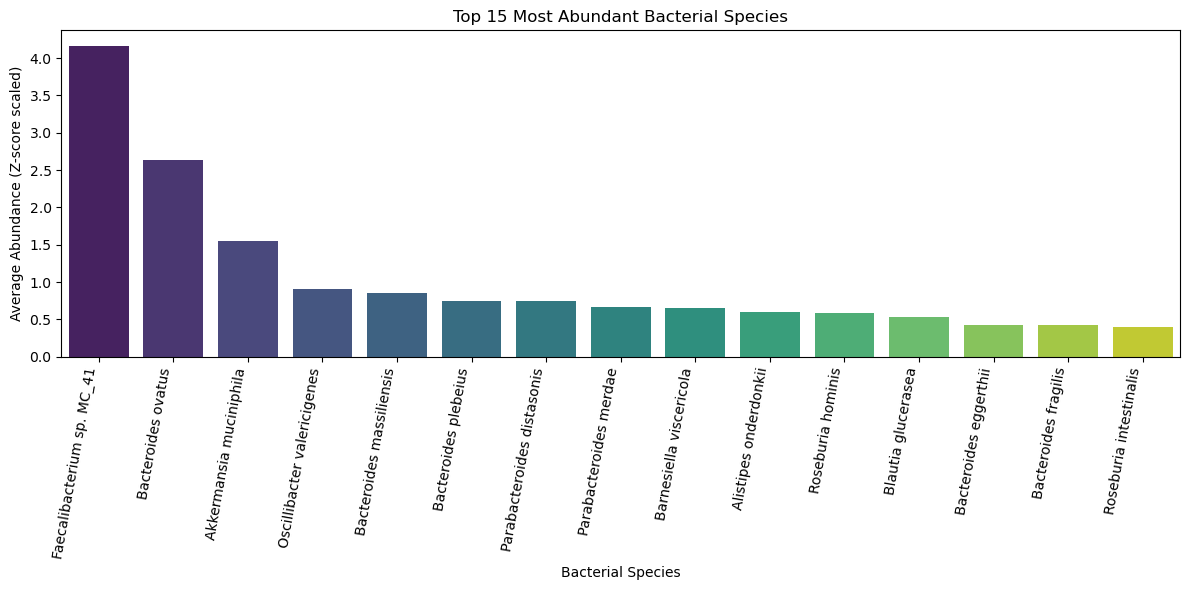

In [14]:
# Example: BMI distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(dev_set_cleaned['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

# Correlation heatmap (clearly visualizes relationships)
plt.figure(figsize=(12, 10))
sns.heatmap(dev_set_cleaned.corr(), cmap='spring')
plt.title("Correlation Heatmap")
plt.show()

# Calculate mean abundance for each bacterial species across samples
bacteria_species_cleaned=dev_set_cleaned.columns.drop(['BMI'])
mean_abundance = dev_set_cleaned[bacteria_species_cleaned].mean().sort_values(ascending=False).head(15)

# Plotting the top 15 most abundant bacteria species
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_abundance.index, y=mean_abundance.values, palette="viridis")
plt.title('Top 15 Most Abundant Bacterial Species')
plt.ylabel('Average Abundance (Z-score scaled)')
plt.xlabel('Bacterial Species')
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()

In [16]:
dev_set_cleaned.to_csv("../data/development_final_data.csv")

Validation dataset

In [17]:
df_val = pd.read_csv("../data/assignment1_val_set.csv")

In [18]:
df_val.shape

(211, 141)

In [19]:
df_val.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
bacteria_cols = dev_set_cleaned.columns[1:]
bacteria_df_val = df_val[bacteria_cols.intersection(df_val.columns)]
val_set_cleaned = pd.concat([df_val.iloc[:, :7], bacteria_df_val], axis=1)
val_set_cleaned = val_set_cleaned.drop(columns=['Unnamed: 0','Project ID','Experiment type','Sex', 'Host age', 'Disease MESH ID']) 

val_set_cleaned.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium saccharogumia,Clostridium saccharolyticum,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci
0,25.71,0.0,0.000000,1.621960,0.0,0.000000,0.068238,0.020996,0.0,0.031494,...,0.062989,0.167970,0.000000,2.871240,0.0,0.068238,0.115479,0.010498,0.000000,0.010498
1,27.20,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,22.35,0.0,0.002095,0.000000,0.0,0.002095,0.041895,0.000000,0.0,0.140346,...,0.006284,0.037705,0.000000,0.064936,0.0,0.016758,0.000000,0.010474,0.006284,0.014663
3,25.52,0.0,0.000000,0.044998,0.0,0.013846,0.010384,0.000000,0.0,0.041537,...,0.010384,0.003461,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.020768,0.034614
4,21.60,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
val_set_cleaned.to_csv("../data/evaluation_final_data.csv")

-----


Not applicable

Cleaning process 1 : Apply prevalence threshold 

In [8]:
# Set a threshold that keeps only bacteria that are over 0.1% in at least 10% of the samples

def prevalence_threshold(df):

    #Select the bacterial abundance part of the df
    bacteria_df = df.iloc[:, 7:]  

    # Calculate percentage per row
    row_totals = bacteria_df.sum(axis=1)
    bacteria_percent = bacteria_df.div(row_totals, axis=0) * 100

    # Apply threshold:
    prevalence_threshold = 0.1
    sample_threshold = 0.1 * len(bacteria_df)

    columns_to_keep = bacteria_percent.columns[(bacteria_percent > prevalence_threshold).sum() > sample_threshold]

    # Filter the original df to keep only those columns
    # And preserve metadata
    df_filtered = pd.concat([df.iloc[:, :6], bacteria_df[columns_to_keep]], axis=1)

    return df_filtered



In [9]:
df_filtered1 = prevalence_threshold(df_dev)
df_filtered1

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Acidaminococcus intestini,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium saccharogumia,Clostridium saccharolyticum,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,0.000000,0.017674,0.000000,0.000000,...,0.000000,0.002946,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,0.000000,13.015800,0.001542,0.000000,...,0.000000,0.007194,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,0.000000,0.002812,0.201074,0.000000,...,0.002812,0.029528,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,0.273562,0.044123,0.004412,0.348570,...,0.013237,0.163254,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,7.359970,0.872143,0.000000,0.000000,...,0.002878,0.423119,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.054689,0.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,484,PRJNA397219,Metagenomics,Male,60.0,24.97,0.000000,0.509040,0.015800,0.018390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
485,485,PRJNA388263,Metagenomics,Male,52.0,25.80,0.000000,0.005112,0.015139,0.000000,...,0.000786,0.027133,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000197,0.004522
486,486,PRJNA397219,Metagenomics,Male,78.0,29.53,0.000000,0.052094,0.093770,0.000000,...,0.086824,0.086824,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.065986,0.000000
487,487,PRJEB11419,Metagenomics,Male,43.0,25.55,0.122888,0.000000,0.001556,0.045111,...,0.004667,0.116666,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.009333,0.018667


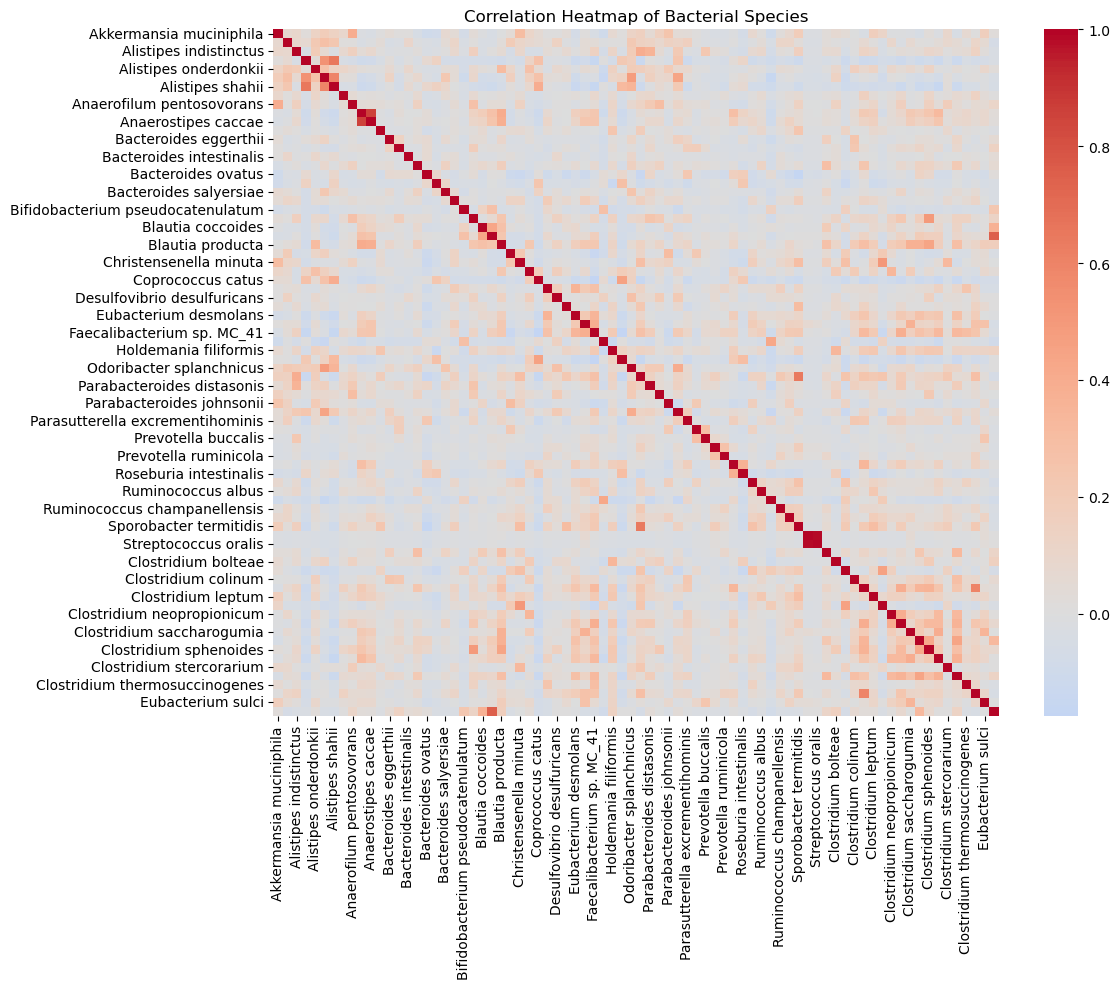

In [31]:
corr = df_filtered1.iloc[:, 7:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Bacterial Species")
plt.tight_layout()
plt.show()

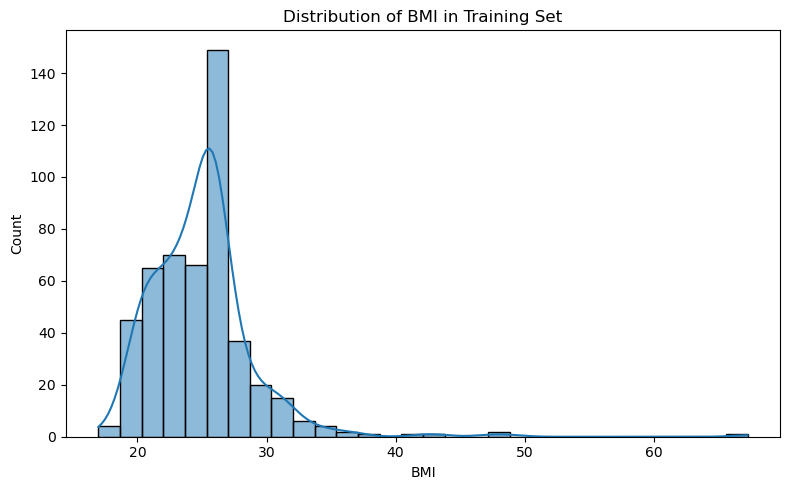

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered1["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI in Training Set")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

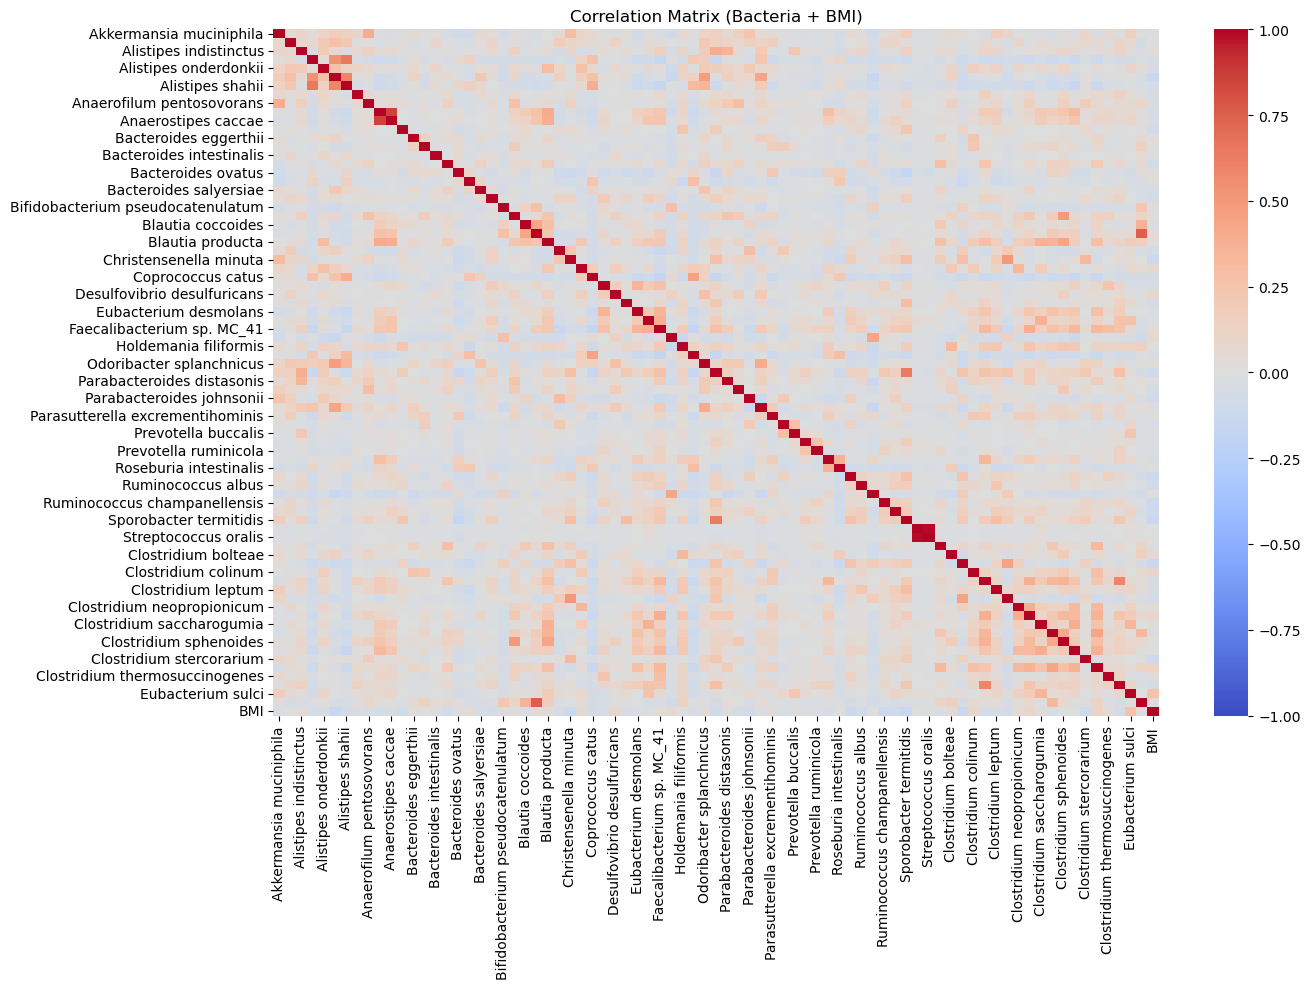

In [39]:

corr_matrix = df_filtered1.iloc[:, 7:].copy()
corr_matrix["BMI"] = df_filtered1["BMI"]

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Bacteria + BMI)")
plt.tight_layout()
plt.show()


c:\dev\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Maria Defteraiou\AppData\Local\Temp\ipykernel_43580\2040296189.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


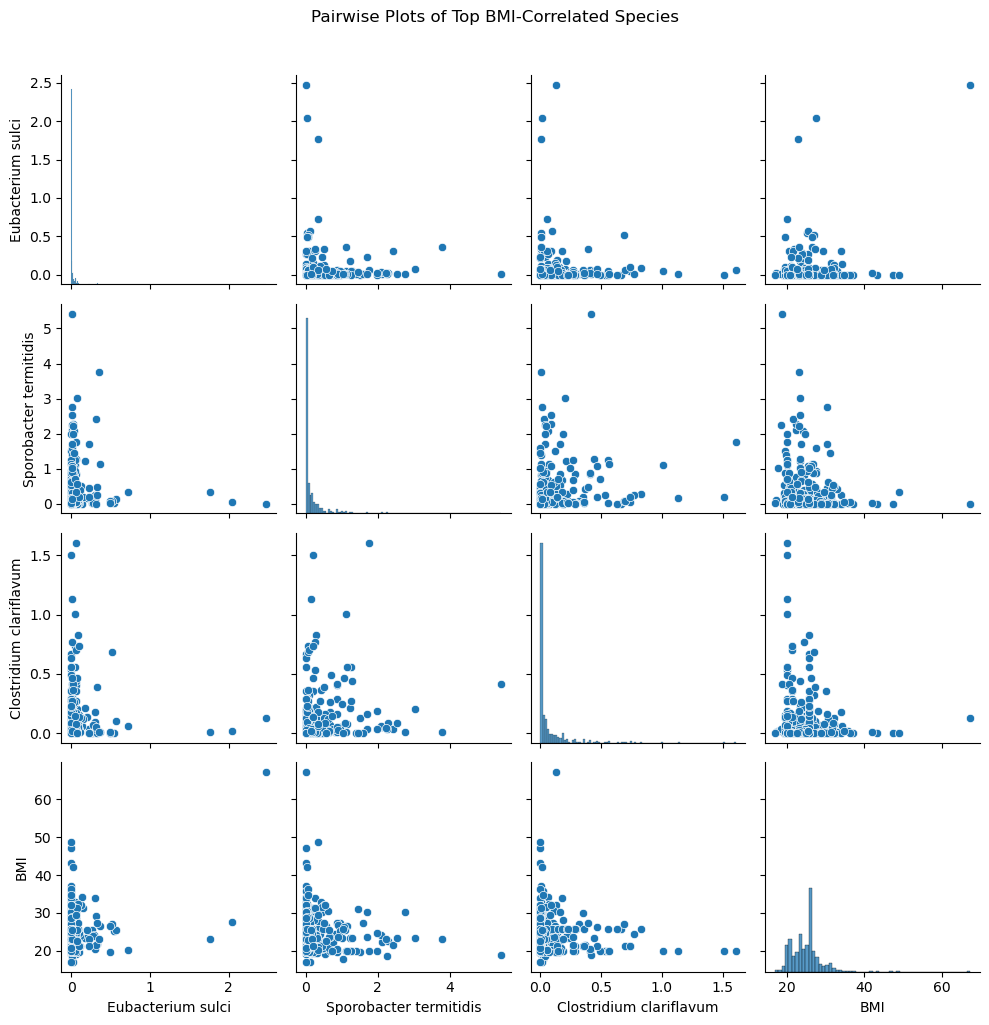

In [32]:

corrs = df_filtered1.iloc[:, 7:].corrwith(df_filtered1["BMI"])
top_bmi_species = corrs.abs().sort_values(ascending=False).head(3).index

sns.pairplot(df_filtered1, vars=top_bmi_species.tolist() + ["BMI"])
plt.suptitle("Pairwise Plots of Top BMI-Correlated Species", y=1.02)
plt.tight_layout()
plt.show()


Cleaning process 2: Cleaning with correlation of bacteria to BMI

In [42]:
def bmi_correlation(df):
    # Step 1: Setup
    bacteria_cols = df.columns[7:] 
    bmi = df["BMI"]

    # Step 2: Map each species to its genus
    col_to_genus = {col: col.split(' ')[0] for col in bacteria_cols}

    # Step 3: Correlation of each species with BMI
    species_corr = df[bacteria_cols].corrwith(bmi)

    # Step 4: Group correlations by genus and compute average absolute correlation
    genus_corrs = {}
    for col, genus in col_to_genus.items():
        genus_corrs.setdefault(genus, []).append(species_corr[col])

    genus_avg_corr = {genus: pd.Series(corrs).abs().mean() for genus, corrs in genus_corrs.items()}
    genus_corr_df = pd.DataFrame.from_dict(genus_avg_corr, orient='index', columns=['avg_abs_corr'])

    # Step 5: Select genera with average abs correlation > 0.1
    threshold = 0.1
    selected_genera = genus_corr_df[genus_corr_df['avg_abs_corr'] > threshold].index

    # Step 6: Filter species columns to keep only those from selected genera
    selected_species = [col for col in bacteria_cols if col_to_genus[col] in selected_genera]

    # Step 7: Build the final DataFrame
    df_species_selected = pd.concat([df.iloc[:, :6], df[selected_species]], axis=1)

    return df_species_selected


Clean the filtered dataset with the threshold (df_filtered) 

In [41]:
df_species_selected = bmi_correlation(df_filtered1)
df_species_selected

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium saccharogumia,Clostridium saccharolyticum,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,0.000000,0.000000,0.00000,0.117827,...,0.000000,0.002946,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,0.001542,0.000000,0.00000,0.073486,...,0.000000,0.007194,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,0.201074,0.000000,0.00000,0.043590,...,0.002812,0.029528,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,0.004412,0.348570,0.00000,0.026474,...,0.013237,0.163254,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,0.000000,0.000000,0.00000,1.732770,...,0.002878,0.423119,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.054689,0.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,484,PRJNA397219,Metagenomics,Male,60.0,24.97,0.015800,0.018390,0.06278,0.059660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
485,485,PRJNA388263,Metagenomics,Male,52.0,25.80,0.015139,0.000000,0.00000,0.020054,...,0.000786,0.027133,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000197,0.004522
486,486,PRJNA397219,Metagenomics,Male,78.0,29.53,0.093770,0.000000,0.00000,0.211850,...,0.086824,0.086824,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.065986,0.000000
487,487,PRJEB11419,Metagenomics,Male,43.0,25.55,0.001556,0.045111,0.00000,0.090222,...,0.004667,0.116666,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.009333,0.018667


In [ ]:
df_species_selected.head()

,Host age,BMI,Christensenella minuta,Eubacterium desmolans,Eubacterium xylanophilum,Ruminiclostridium thermocellum,Sporobacter termitidis,Eubacterium sulci
0,53.0,19.01,0.000000,0.002946,0.000000,0.023565,0.002946,0.002946
1,21.0,23.50,3.756010,0.102778,0.020042,5.153270,3.026290,0.077597
2,52.0,25.80,0.154673,0.011249,0.005624,0.104052,0.008437,0.005624
3,40.0,23.49,0.017649,0.198553,0.066184,0.061772,0.233851,0.000000
4,30.0,22.60,0.031662,0.005757,0.000000,0.014392,0.025905,0.054689


In [17]:
df_species_selected.to_csv("../data/development_final_data.csv")

Validation dataset

In [18]:
df_val = pd.read_csv("../data/assignment1_val_set.csv")

In [19]:
df_val.shape

(211, 141)

In [20]:
df_val.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_filtered2 = prevalence_threshold(df_val)
df_filtered2 

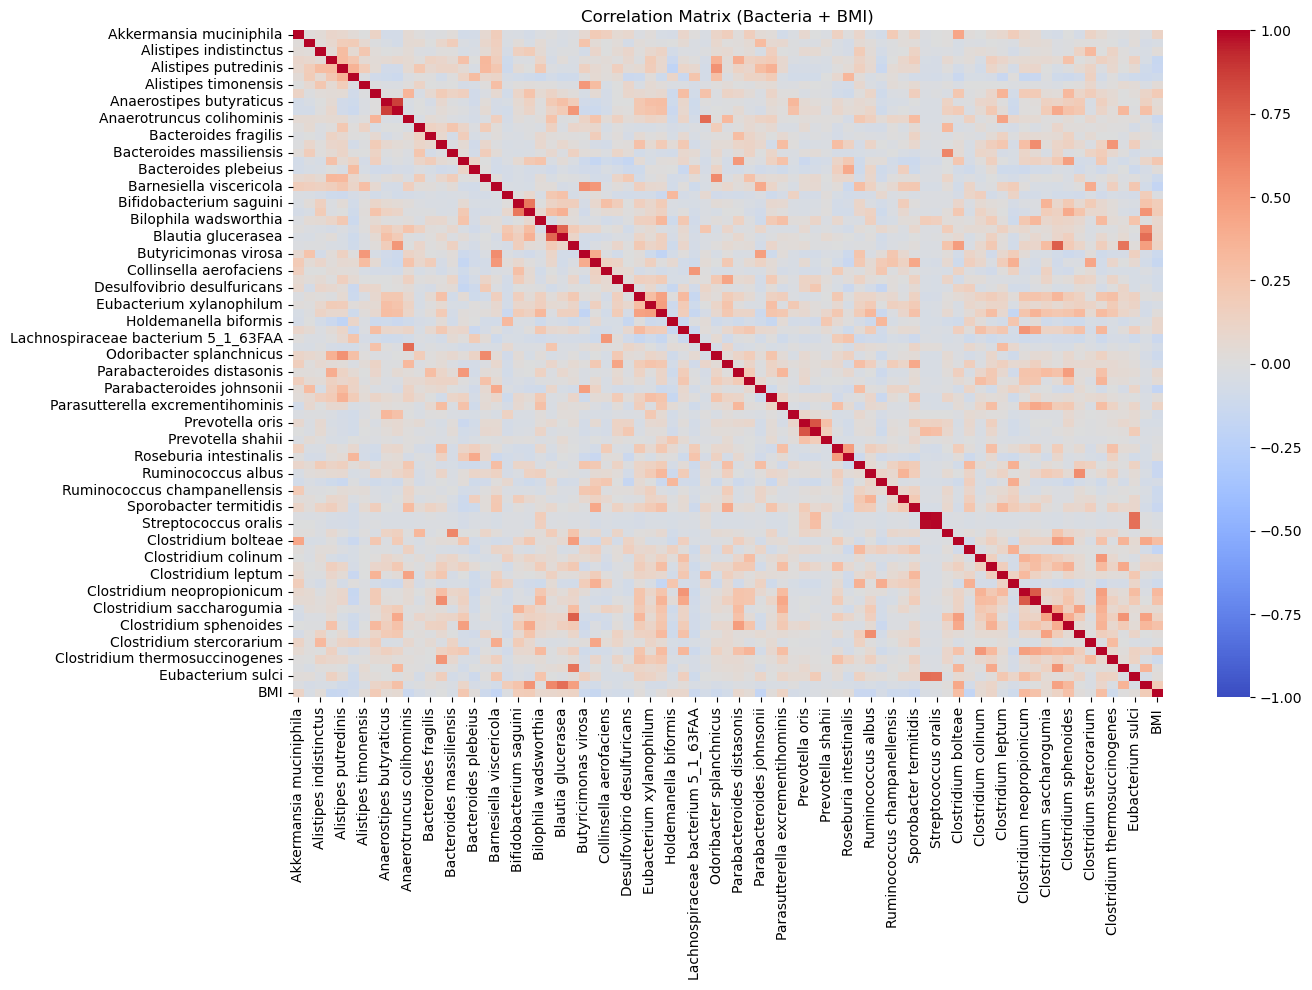

In [38]:
corr_matrix = df_filtered2.iloc[:, 7:].copy()
corr_matrix["BMI"] = df_filtered2["BMI"]

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Bacteria + BMI)")
plt.tight_layout()
plt.show()

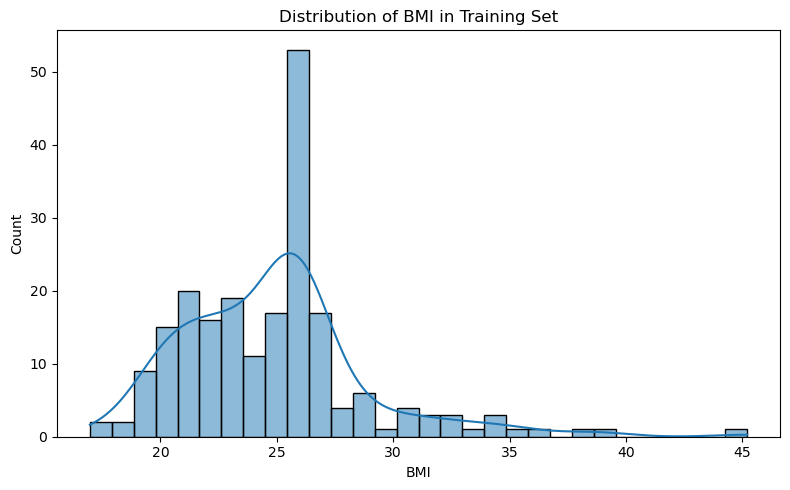

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered2["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI in Training Set")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

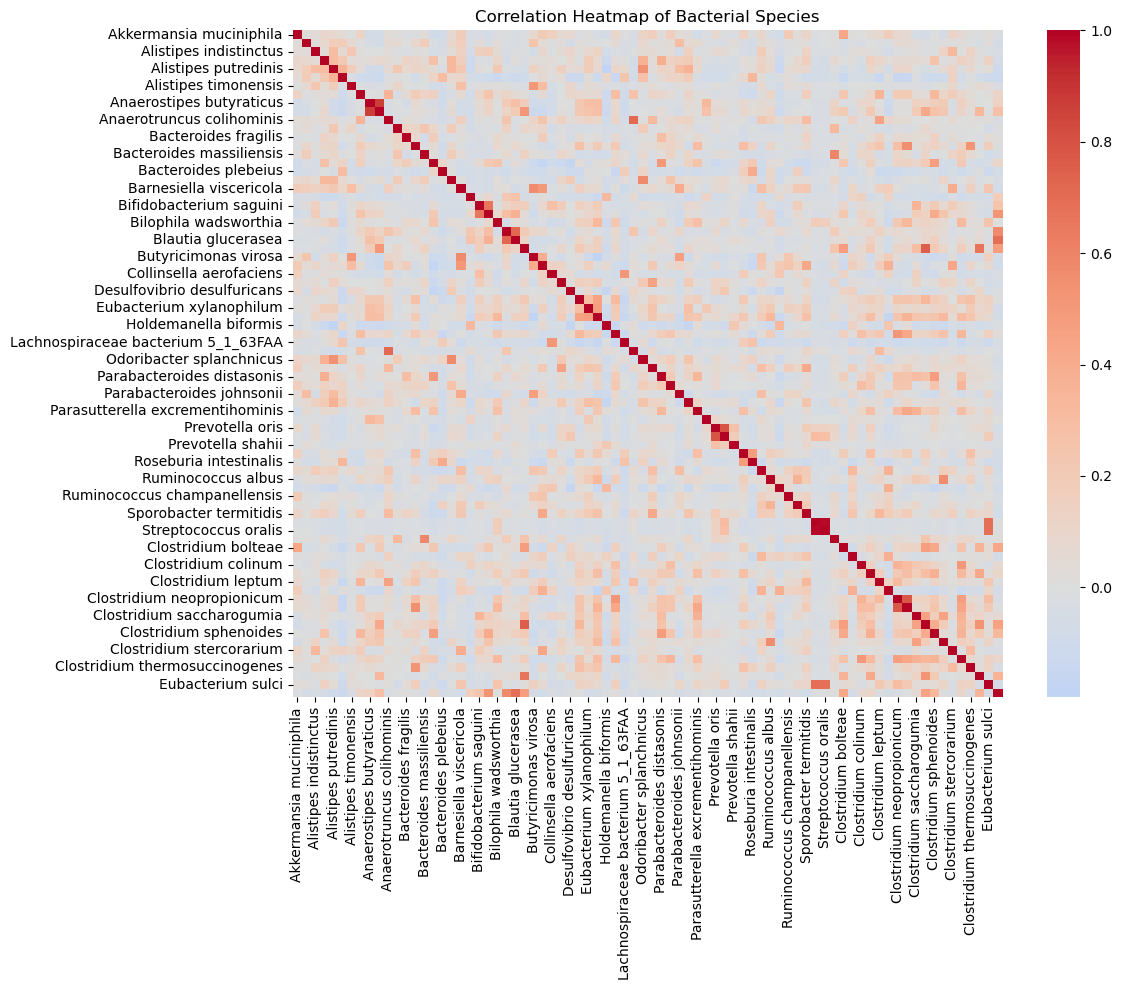

In [36]:
corr = df_filtered2.iloc[:, 7:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Bacterial Species")
plt.tight_layout()
plt.show()


c:\dev\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Maria Defteraiou\AppData\Local\Temp\ipykernel_43580\3093914805.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


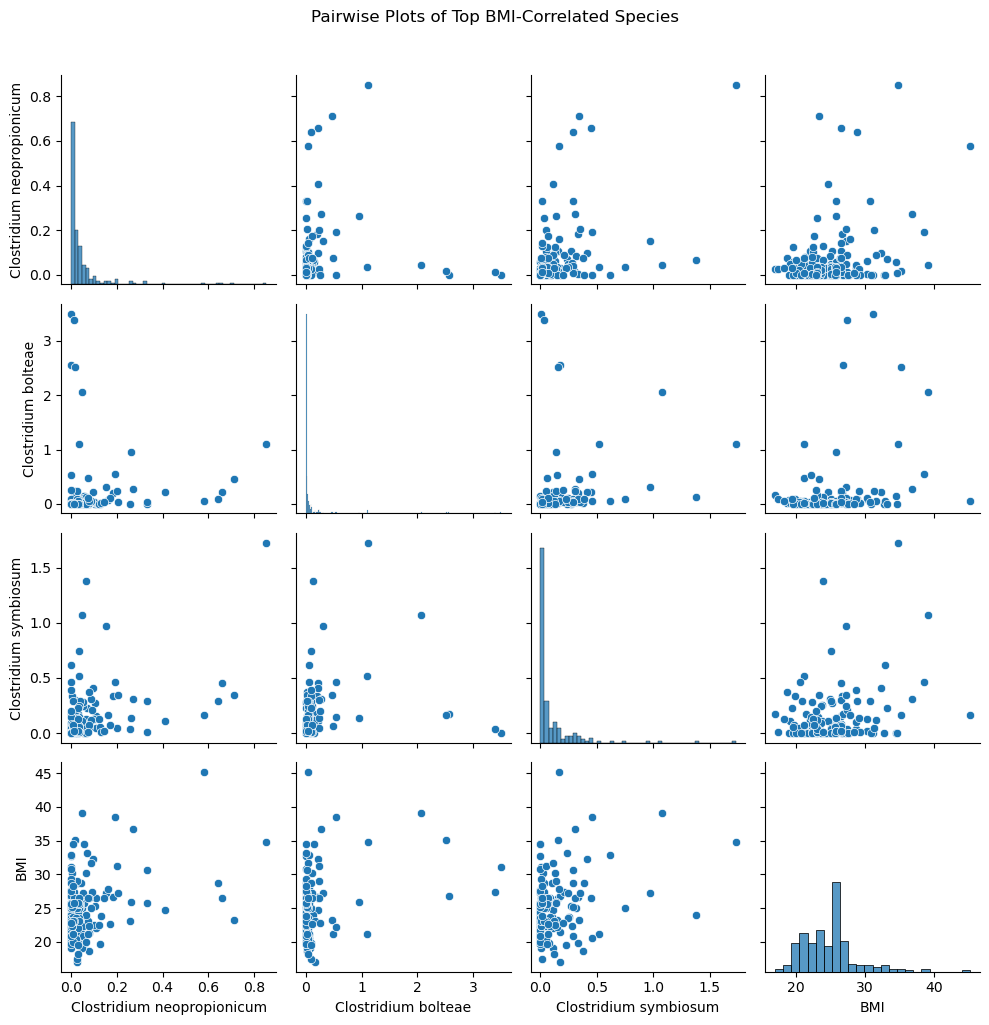

In [37]:

corrs = df_filtered2.iloc[:, 7:].corrwith(df_filtered2["BMI"])
top_bmi_species = corrs.abs().sort_values(ascending=False).head(3).index

sns.pairplot(df_filtered2, vars=top_bmi_species.tolist() + ["BMI"])
plt.suptitle("Pairwise Plots of Top BMI-Correlated Species", y=1.02)
plt.tight_layout()
plt.show()

In [27]:
bacteria_cols = df_species_selected2.columns[2:]
bacteria_df_val = df_val[bacteria_cols.intersection(df_val.columns)]
df_filtered_val = pd.concat([df_val.iloc[:, :6], bacteria_df_val], axis=1)
df_filtered_val = df_filtered_val.drop(columns=['Project ID','Experiment type','Sex']) 
df_filtered_val = df_filtered_val.iloc[:, 1:]

df_filtered_val.head()


,Host age,BMI,Christensenella minuta,Eubacterium desmolans,Eubacterium xylanophilum,Ruminiclostridium thermocellum,Sporobacter termitidis,Eubacterium sulci
0,60.0,25.71,0.005249,0.488163,0.026245,0.545903,0.178468,0.010498
1,57.0,27.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,65.0,22.35,0.041895,0.031421,0.002095,0.006284,0.029326,0.014663
3,55.0,25.52,0.000000,0.031153,0.000000,0.038075,0.006923,0.034614
4,54.0,21.60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
df_filtered_val = df_filtered_val.to_csv("../data/evaluation_final_data.csv")